# A review notebook on DM 


In [1]:
import astropy.io.fits as fits
import astropy.wcs as wcs

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [3]:
with fits.open('maps/nfw_annih10deg-gammapy.fits') as hdul:
    data = hdul[0].data
    header = hdul[0].header

In [13]:
with fits.open("/home/mpotto/Pesquisa/astroph/data/map_fermi_bubbles.fits") as hdul:
    data = hdul[0].data
    header = hdul[0].header

In [4]:
plt.style.use('astroph')

In [5]:
from dm.plotting import profile_plot

In [16]:
teste_wcs = wcs.WCS(header)

In [17]:
wcs.WCS(header)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-MOL'  'GLAT-MOL'  
CRVAL : 0.0  0.0  
CRPIX : 81.0  141.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.5  0.5  
NAXIS : 161  281

In [18]:
from astropy.coordinates import Galactic
import astropy.units as u

In [49]:
data.max()

9.467893445461097

In [51]:
data.min()

-0.0

In [69]:
teste_wcs.all_world2pix([[0, 0]], 1)

array([[ 81., 141.]])

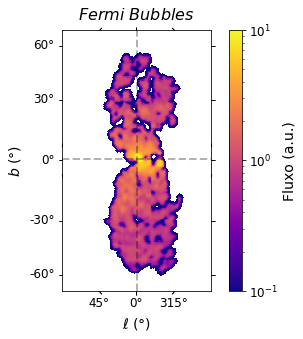

In [75]:
fig = plt.figure()
plt.subplot(projection=teste_wcs)
img = plt.imshow(data, origin='lower',cmap=plt.cm.plasma, norm=colors.LogNorm(vmin=1e-1, vmax=10))
cb = fig.colorbar(img, label="Fluxo (a.u.)")
plt.title(r'$\mathit{Fermi}$ $\mathit{Bubbles}$', pad=10)
plt.xlabel(r"$\ell$ (°)")
plt.ylabel(r"$b$ (°)")
plt.axvline(x=81, color='k', zorder=1, lw=2, linestyle='dashed', alpha=0.3)
plt.axhline(y=141, color='k', zorder=1, lw=2, linestyle='dashed', alpha=0.3)
plt.savefig('/home/mpotto/Documents/Pôster/bubbles.pdf', bbox_inches='tight')
